The objective of this project is to analyze SAT scores for NYC schools to see whether there are any statistical relationships between class size, demographics, graduation rates, app classes, or survey results. 

# Data cleaning and preparation

In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
#Read in data from https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4

data_folder = "/Users/Taylor/OneDrive/Documents/DC/Dataquest/Projects/Analyzing NYC High School Data/"

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files:
    file_to_open = data_folder + f
    d = pd.read_csv(file_to_open)
    data[f.replace(".csv", "")] = d

In [3]:
data

{'ap_2010':         DBN                                         SchoolName  \
 0    01M448                       UNIVERSITY NEIGHBORHOOD H.S.   
 1    01M450                             EAST SIDE COMMUNITY HS   
 2    01M515                                LOWER EASTSIDE PREP   
 3    01M539                     NEW EXPLORATIONS SCI,TECH,MATH   
 4    02M296              High School of Hospitality Management   
 ..      ...                                                ...   
 253  31R605                         STATEN ISLAND TECHNICAL HS   
 254  32K545                      EBC-HS FOR PUB SERVICE (BUSH)   
 255  32K552                          Academy of Urban Planning   
 256  32K554               All City Leadership Secondary School   
 257  32K556  Bushwick Leaders High School for Academic Exce...   
 
      AP Test Takers   Total Exams Taken  Number of Exams with scores 3 4 or 5  
 0               39.0               49.0                                  10.0  
 1               19.0

In [4]:
# Ready surveys
all_survey = pd.read_csv(data_folder + "survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv(data_folder + "survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)

survey["DBN"] = survey["dbn"]

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey[survey_fields]
data["survey"] = survey

C:\Users\Taylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [5]:
data["survey"]

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,75X352,90.0,58,48,38.0,46.0,160.0,8.9,8.3,7.9,...,5.7,5.8,6.8,6.0,7.8,7.6,7.4,6.6,7.1,7.2
52,75X721,84.0,90,48,237.0,82.0,239.0,8.6,7.6,7.5,...,6.7,7.0,7.8,7.2,7.8,7.9,8.0,7.1,7.3,7.6
53,75X723,77.0,74,20,103.0,69.0,74.0,8.4,7.8,7.8,...,6.7,7.6,6.7,7.2,7.7,7.7,7.6,7.4,7.4,7.7
54,75X754,63.0,93,22,336.0,82.0,124.0,8.3,7.5,7.5,...,6.6,7.1,6.8,6.6,7.6,7.7,7.2,6.9,7.3,7.5


In [6]:
#Add DBN columns
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

In [9]:
#Convert columns to numeric
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

In [11]:
#Condense datasets
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size

data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

In [12]:
#Convert AP scores to numeric
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

In [13]:
#Combine the datasets
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

In [16]:
#Add a school district column for mapping
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

In [17]:
#Find correlations
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.523140
                                     ...   
Census Tract                       0.048737
BIN                                0.052232
BBL                                0.044427
lat                               -0.121029
lon                               -0.132222
Name: sat_score, Length: 85, dtype: float64


# Surveys

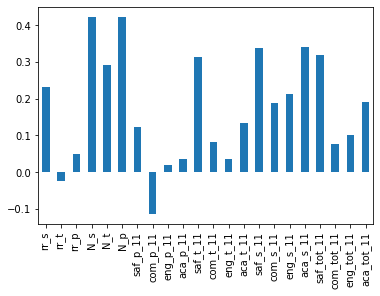

In [24]:
#Correlations between survey and SAT scores
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
#survey_fields.remove("DBN")

combined.corr()["sat_score"][survey_fields].plot.bar()


Survey Fields
* rr_s	Student Response Rate
* rr_t	Teacher Response Rate
* rr_p	Parent Response Rate
* N_s	Number of student respondents
* N_t	Number of teacher respondents
* N_p	Number of parent respondents
* nr_s	Number of eligible students
* nr_t	Number of eligible teachers
* nr_p	Number of eligible parents
* saf_p_11	Safety and Respect score based on parent responses
* com_p_11	Communication score based on parent responses
* eng_p_11	Engagement score based on parent responses
* aca_p_11	Academic expectations score based on parent responses
* saf_t_11	Safety and Respect score based on teacher responses
* com_t_11	Communication score based on teacher responses
* eng_t_11	Engagement score based on teacher responses
* aca_t_11	Academic expectations score based on teacher responses
* saf_s_11	Safety and Respect score based on student responses
* com_s_11	Communication score based on student responses
* eng_s_11	Engagement score based on student responses
* aca_s_11	Academic expectations score based on student responses
* saf_tot_11	Safety and Respect total score
* com_tot_11	Communication total score
* eng_tot_11	Engagement total score
* aca_tot_11	Academic Expectations total score

Based on above, the number of students, teachers, and parents responding is highly correlated with SAT results, perhaps a proxy for engagement. Safety and academic expectations are also highly correlated. 

Text(0, 0.5, 'SAT Score')

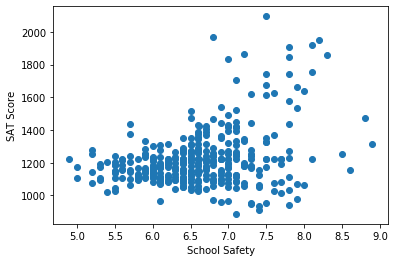

In [27]:
plt.scatter(combined["saf_s_11"], combined["sat_score"])
plt.xlabel("School Safety")
plt.ylabel("SAT Score")

Based on above, looks like there is a positive correlation between school safety and SAT scores.

C:\Users\Taylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
C:\Users\Taylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


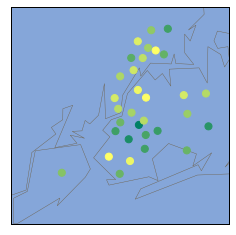

In [32]:
from mpl_toolkits.basemap import Basemap

districts = combined.groupby("school_dist").agg(np.mean)
districts.reset_index(inplace=True)

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer")
plt.show()

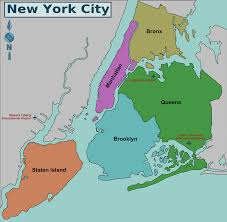

Looks like Queens has safeest scools and Manhattan and Brooklyn have low scores

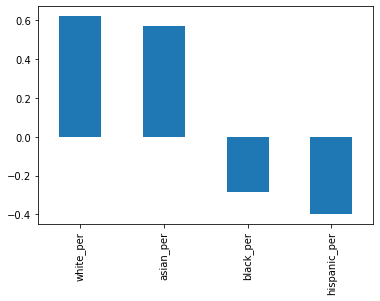

In [33]:
racial_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined.corr()["sat_score"][racial_fields].plot.bar()

Looks like negative correlations between schools with higher percentages of black and hispanic students to SAT scores. 

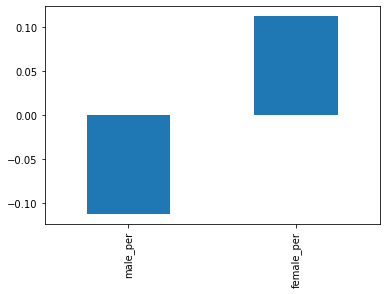

In [36]:
combined.corr()["sat_score"][["male_per", "female_per"]].plot.bar()

Looks like weak positive correlations between schools with higher percentages of females to SAT scores. 

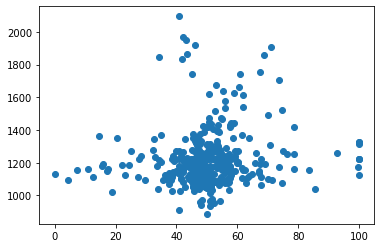

In [41]:
plt.scatter(combined["female_per"], combined["sat_score"])

Although scatter plot doesn't look like a clear correlation

In [43]:
high_fem_scores = combined[combined["female_per"] > .6]
high_fem_scores = combined[combined["sat_score"] > 1700]
high_fem_scores

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon,school_dist
5,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624.0,604.0,628.0,1856.0,0,129.028846,197.038462,...,"525 East Houston Street\nNew York, NY 10002\n(...",3.0,2.0,1002.0,1004062.0,1.003250e+09,Lower East Side ...,40.718962,-73.976066,01
26,02M416,ELEANOR ROOSEVELT HIGH SCHOOL,127,572.0,594.0,592.0,1758.0,Eleanor Roosevelt High School,155.000000,235.000000,...,"411 East 76 Street\nNew York, NY 10021\n(40.77...",8.0,5.0,132.0,1045949.0,1.014710e+09,Lenox Hill-Roosevelt Island ...,40.770116,-73.953379,02
37,02M475,STUYVESANT HIGH SCHOOL,832,679.0,735.0,682.0,2096.0,STUYVESANT HS,1510.000000,2819.000000,...,"345 Chambers Street\nNew York, NY 10282\n(40.7...",1.0,1.0,31703.0,1084587.0,1.000160e+09,Battery Park City-Lower Manhattan ...,40.717746,-74.014049,02
60,03M479,BEACON HIGH SCHOOL,261,577.0,575.0,592.0,1744.0,BEACON SCHOOL,166.000000,197.000000,...,"227 243 West 61St Street\nNew York, NY 10023\n...",7.0,6.0,151.0,1030328.0,1.011540e+09,Lincoln Square ...,40.772158,-73.987797,03
61,03M485,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...,531,566.0,564.0,577.0,1707.0,FIORELLO H.LAGUARDIA HS,691.000000,1236.000000,...,"100 Amsterdam Avenue\nNew York, NY 10023\n(40....",7.0,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,40.773671,-73.985269,03
79,05M692,"HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGIN...",101,605.0,654.0,588.0,1847.0,HIGH SCHOOL FOR MATH SCIENCE ENGINEERING @ CCNY,114.000000,124.000000,...,"240 Convent Ave\nNew York, NY 10031\n(40.82112...",9.0,9.0,21703.0,1084085.0,1.019570e+09,Manhattanville ...,40.821123,-73.948845,05
151,10X445,BRONX HIGH SCHOOL OF SCIENCE,731,632.0,688.0,649.0,1969.0,BRONX HS OF SCIENCE,1190.000000,2435.000000,...,"75 West 205 Street\nBronx, NY 10468\n(40.87705...",7.0,11.0,409.0,2094706.0,2.032510e+09,Van Cortlandt Village ...,40.877056,-73.889780,10
155,10X696,HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE,92,636.0,648.0,636.0,1920.0,HIGH SCHOOL OF AMERICAN STUDIES At Lehman College,194.000000,302.000000,...,"2925 Goulden Avenue\nBronx, NY 10468\n(40.8712...",8.0,11.0,409.0,2015222.0,2.032460e+09,Van Cortlandt Village ...,40.871255,-73.897516,10
187,13K430,BROOKLYN TECHNICAL HIGH SCHOOL,1277,587.0,659.0,587.0,1833.0,BROOKLYN TECHNICAL HS,2117.000000,3692.000000,...,"29 Ft Greene Place\nBrooklyn, NY 11217\n(40.68...",2.0,35.0,33.0,3058752.0,3.020980e+09,Fort Greene ...,40.688107,-73.976745,13
198,14K449,"BROOKLYN LATIN SCHOOL, THE",72,586.0,584.0,570.0,1740.0,0,129.028846,197.038462,...,"223 Graham Avenue\nBrooklyn, NY 11206\n(40.709...",1.0,34.0,505.0,3070825.0,3.030250e+09,East Williamsburg ...,40.709900,-73.943660,14


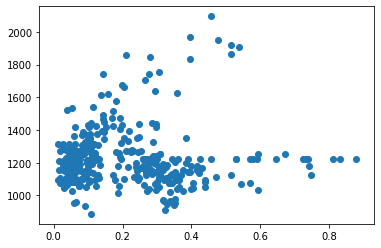

In [46]:
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]
plt.scatter(combined["ap_per"], combined["sat_score"])

Looks like a weak positive relationship between AP percentage and SAT Scores

# Conclusion

Overall, it looks like the following, SAT scores are
* Strongly correlated with school safety
* Strongly correlated with survey response %
* Strongly correlated with race
* Weakly correlated with gender
* Weakly correlated with AP class %

Potential future areas of exploration include class size, property values, or other attributes